# Computational carpentry project

### Group 15 : Emma Brand, Ella  Dengler, Diane Tambey

# Part A :

1. Load the “.csv” data file you are assigned using pandas (0)
2. Explain what the data is about (5)
3. What are the datatypes in your dataframe ? (5)
4. How many rows and columns do you have ? (5 each)
5. Do you have missing data ? If yes, how many ? (5)

## Question 1 :

In [5]:
import pandas as pd
df=pd.read_csv('5-Steel_industry.csv') #Import the datafile to use it. 

## Question 2 :

Our data provides information on the energy consumption of DAEWOO Steel Co. Ltd Industry, located in Gwangyang (South Korea). This industry produces coils, steel plates and iron plates. The data covers energy consumption over 1 year (2018) and is measured every 15 minutes, giving a total of 35041 samples.

## Question 3 :

In [6]:
print(df.dtypes) #give the type of each column

Date_Time                                object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_Of_Week                              object
Load_Type                                object
dtype: object


## Question 4 : 

In [7]:
rows, columns = df.shape #based on the shape, counts the number of rows and columns
print(f"The Data has {rows} rows and {columns} columns")

The Data has 35041 rows and 11 columns


## Question 5 :

In [8]:
missing_data = df.isnull().sum() # Find the missing values and add them over a column
print (missing_data)

total_missing_data = df.isnull().sum().sum() # Find the missing values and add them together
print(f"\nThe total number of missing values is {total_missing_data}")

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
Load_Type                               0
dtype: int64

The total number of missing values is 0


# Part B :

1. Select 2 subsets (i.e., certain rows) of your data using Boolean indexing. The selection
must be based on 2 different conditions (10 each)
2. Explain your choices (5)
3. Discuss at least 4 interesting points of your data. For instance, you can find maxima,
minima, mean, standard deviation, etc… (5 each)

## Question 1 :

In [9]:
subset1=df[(df['Day_Of_Week'] == 'Sunday') & (df['CO2(tCO2)'] > 0.02)]
subset2=df[(df['Day_Of_Week'] == 'Monday') & (df['CO2(tCO2)'] > 0.02)]
print("Subset 1:")
print(subset1)
print("\nSubset 2:")
print(subset2)

Subset 1:
              Date_Time  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
1311   14/01/2018 16:00      58.86                                 20.92   
5280   25/02/2018 00:15      67.18                                 37.19   
5281   25/02/2018 00:30      60.98                                 36.29   
9345   08/04/2018 08:30      99.14                                 52.99   
9346   08/04/2018 08:45      68.90                                 39.46   
...                 ...        ...                                   ...   
33560  16/12/2018 14:15      57.89                                 22.25   
33565  16/12/2018 15:30      60.55                                 29.38   
33567  16/12/2018 16:00      63.22                                 29.99   
33568  16/12/2018 16:15      62.64                                 27.07   
33569  16/12/2018 16:30      66.02                                 30.60   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
1311               

## Question 2 :

We chose to compare CO2 emissions in tonnes of CO2 for weekends and weekdays. To do this, we chose Monday and Sunday in order to have a single day for each category and to have the same number of samples. The second condition was that the emission had to be greater than 0.02 tCO2. 

We found 118 lines for Sunday and 1,547 lines for Monday. As we can see, CO2 emissions are much higher on weekdays than at weekends. 

To be more precise, we could also have compared Friday and Saturday. 

## Question 3 :

In [10]:
max_value=df["Usage_kWh"].max() #find maximum
min_value=df["Usage_kWh"].min() #find minimum
mean_value=df["Usage_kWh"].mean() #calculate mean value
standard_deviation=df["Usage_kWh"].std() #calculate standard deviation

print(f"Maximum of the usage of energy (kWh) :{max_value}")
print(f"\nMinimum of the usage of energy (kWh) :{min_value}")
print(f"\nMean of the usage of energy (kWh) :{mean_value}")
print(f"\nStandard deviation of the usage of energy (kWh) :{standard_deviation}")

Maximum of the usage of energy (kWh) :157.18

Minimum of the usage of energy (kWh) :0.0

Mean of the usage of energy (kWh) :27.386229274278698

Standard deviation of the usage of energy (kWh) :33.44413284594327


We decided to analyse the data in the ‘Usage_kWh’ column, which corresponds to industrial energy use. We calculated the maximum, minimum, mean and standard deviation. We can see that the average is closer to the minimum, so we have more low values than high values. Although the maximum is high, the energy values remain relatively low. 

We should also bear in mind that the data is collected continuously, every 15 minutes, even when production is not running, which also explains the relatively low average. 

In addition, the standard deviation is large, which means that the data is relatively spread out. 

# Part C :

1. Show parts of your data by creating 2 different data plots. Make sure you use 2 different
plot types (scatter, histograms, density, pie-charts, Venn diagrams, etc…). For that you
can use different libraries (matplotlib, seaborn, Bokeh, venn, etc…). Please add a title,
proper axis labels and legends and make sure the plots are meaningful and readable.
(10 each)
2. Discuss the plots (5 each)

## Question 1 :

In [145]:
import seaborn as sns

In [146]:
import matplotlib.pyplot as plt

### Plot 1 : Bar Plot of Average CO2 Emissions (tCO2) for Different Days of the Week 

In [147]:
avg_co2_per_day = df.groupby('Day_Of_Week')['CO2(tCO2)'].mean() #Calculate average CO2 emissions for each day of the week

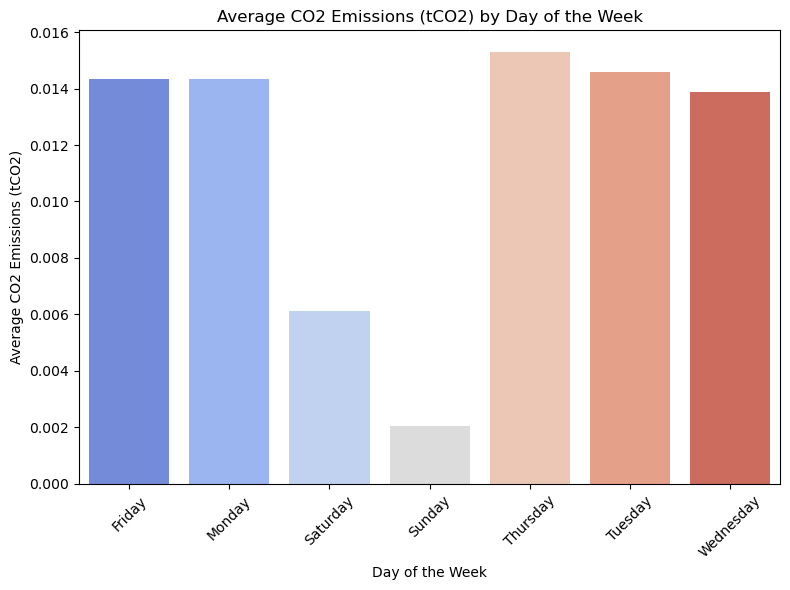

In [148]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_co2_per_day.index, y=avg_co2_per_day.values, palette='coolwarm')
plt.title('Average CO2 Emissions (tCO2) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average CO2 Emissions (tCO2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot 2 : Scatter Plot of CO2 Emissions vs Energy Usage

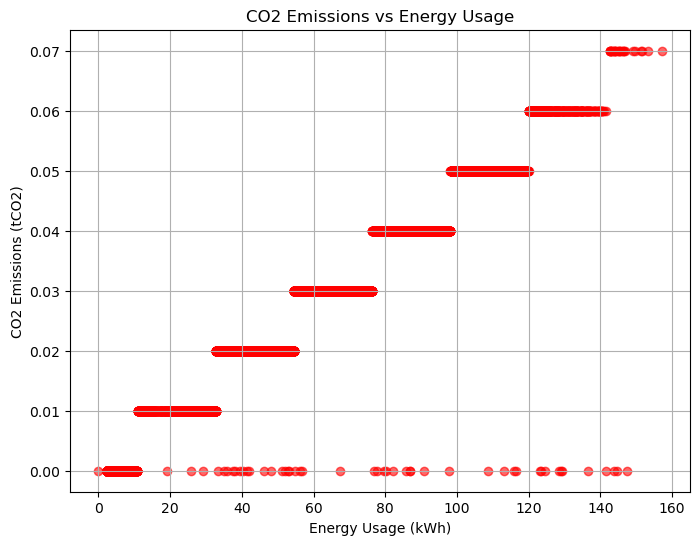

In [151]:
plt.figure(figsize=(8,6)) #create figure
plt.scatter(df['Usage_kWh'], df['CO2(tCO2)'], color='red', alpha=0.6) #add values on figure
plt.title('CO2 Emissions vs Energy Usage')
plt.xlabel('Energy Usage (kWh)')
plt.ylabel('CO2 Emissions (tCO2)')
plt.grid(True)
plt.show()

## Question 2 :

### Plot 1 : 
This graph shows average CO2 emissions in t(CO2) for each day of the week. As can be seen, weekday emissions are higher than weekend emissions. We therefore assume that production does not run at weekends, or at least not as much as on weekdays.

Furthermore, from this plot it can be deduced that the days with the biggest and the least emission of CO2 are Thursday and sunday respectively. 

### Plot 2 : 
This scatter plot shows the relation between CO2 emissions and the usage of energy. They are increasing proportionnally as expected.
From this plot, it can also be deduced that the plot of usage of energy by day of the week should be similar to Plot 1.